A.1.1 Per type (Noisy Tournament)
-----------

Each tournament type.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [2]:
import itertools

In [3]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

Noisy
-------

In [4]:
df = pd.read_csv('../data/main.csv')

In [5]:
noisy_tournaments = df[(~df['noise'].isnull()) & (df['probend'].isnull())]

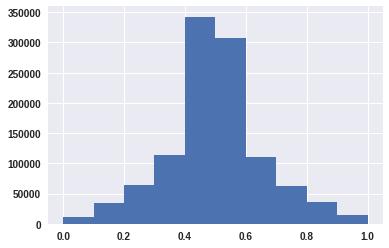

In [6]:
plt.hist(noisy_tournaments['Cooperation_rating']);

In [7]:
winners = noisy_tournaments[noisy_tournaments['Rank'] == 0]

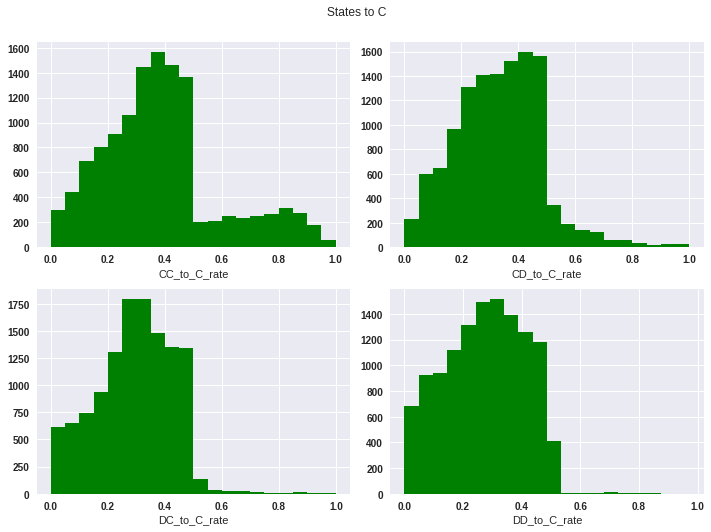

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(winners[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

In [9]:
losers = noisy_tournaments.loc[noisy_tournaments.groupby(['seed'], sort=False)['Rank'].idxmax()]

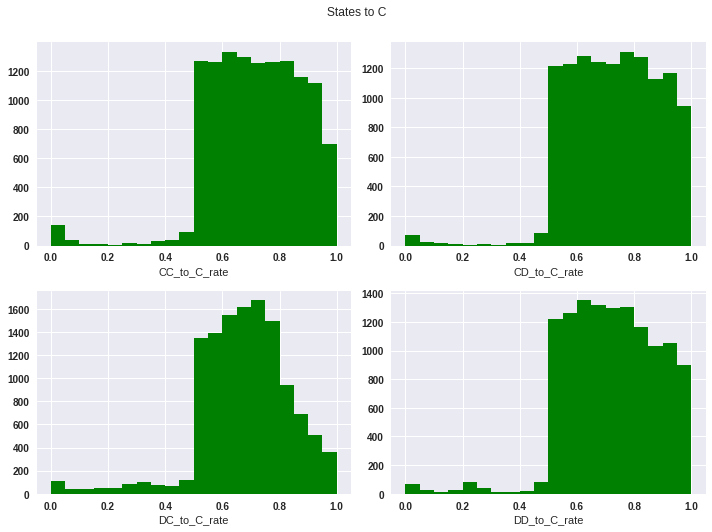

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(losers[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

Fixed data set
--------------

In [11]:
df, name = pd.read_csv('data/noise_tournaments.csv'), 'noise'

In [12]:
df.columns

Index(['index', 'loser coop', 'max coop', 'mean coop', 'median coop',
       'min coop', 'norm rank C', 'norm rank D', 'size', 'std', 'winner coop'],
      dtype='object')

**V. $r$ distribution**

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


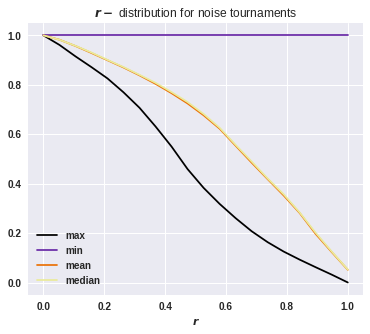

In [13]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))

Based on the analysis above, the following points are made for the noise tournaments:

- the mean/median $C$ has been $\simeq 0.5$
- players that defect more $\simeq 0.4 - 0.2$ do better
- cooperators perform poorly
- the more you cooperative the less well you will do, but the $r-$ distribution is decreasing smoothly

that could be because a less cooperative player does perform well but not a complete defector.